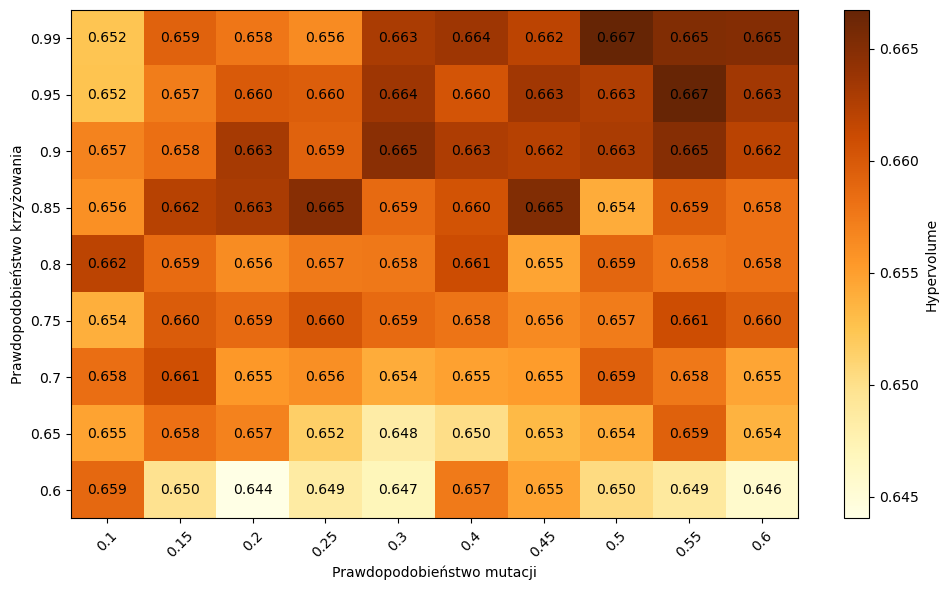

In [10]:
import numpy as np
import re
import json
import matplotlib.pyplot as plt

crossover_values = [0.99, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6]
mutation_values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.45, 0.5, 0.55, 0.6]

with open('hyperVolume_MutCross.json', 'r') as json_file:
    data = json.load(json_file)

# Initialize the sensitivity matrix with zeros
sensitivity_matrix = np.zeros((len(crossover_values), len(mutation_values)))

# Fill in the sensitivity matrix with actual values
for key, value in data.items():
    # Extract crossover and mutation values from the key using regex
    match = re.search(r'cross_(\d+\.\d+) mut_(\d+\.\d+)', key)
    # print(match)
    if match:
        crossover = float(match.group(1))
        mutation = float(match.group(2))
        if crossover in crossover_values and mutation in mutation_values:
            crossover_index = crossover_values.index(crossover)
            mutation_index = mutation_values.index(mutation)
            sensitivity_matrix[crossover_index, mutation_index] = value

# print(sensitivity_matrix)


# Create a heatmap
# Create a heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(sensitivity_matrix, cmap='YlOrBr', interpolation='nearest', aspect='auto')

# Annotate each cell with the sensitivity value
for i in range(len(
crossover_values)):
    for j in range(len(mutation_values)):
        plt.text(j, i, f'{sensitivity_matrix[i, j]:.3f}', ha='center', va='center', color='black')



# Set axis labels
plt.xticks(np.arange(len(mutation_values)), mutation_values, rotation=45)
plt.yticks(np.arange(len(crossover_values)), crossover_values)
plt.xlabel('Prawdopodobieństwo mutacji')
plt.ylabel('Prawdopodobieństwo krzyżowania')

# Display colorbar
cbar = plt.colorbar()
cbar.set_label('Hypervolume')

# Show the plot
# plt.title('Macierz analizy czułości')
plt.tight_layout()

plt.savefig('sensitivityCrossMut.svg', format='svg', bbox_inches='tight')

# Save the plot as PNG
plt.savefig('sensitivityCrossMut.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

[[0.6547925  0.67037447 0.67922083 0.68200205 0.68961883 0.68898813
  0.68449207]
 [0.65016921 0.66356123 0.6690325  0.67285399 0.67707586 0.68454987
  0.68584322]
 [0.64482005 0.65743689 0.65828594 0.66182026 0.66568405 0.67333037
  0.67693034]
 [0.63711056 0.64821749 0.6462044  0.65155627 0.65943817 0.66476492
  0.67264926]
 [0.6281103  0.63665988 0.639968   0.64441493 0.64823707 0.65841098
  0.6544137 ]
 [0.62458743 0.62786666 0.63303544 0.63859076 0.64391314 0.65146826
  0.64468427]
 [0.61390157 0.61929746 0.62070341 0.63602201 0.63663835 0.63860396
  0.63735169]
 [0.59749278 0.60265959 0.61254632 0.61257125 0.61596083 0.61669517
  0.62165161]]


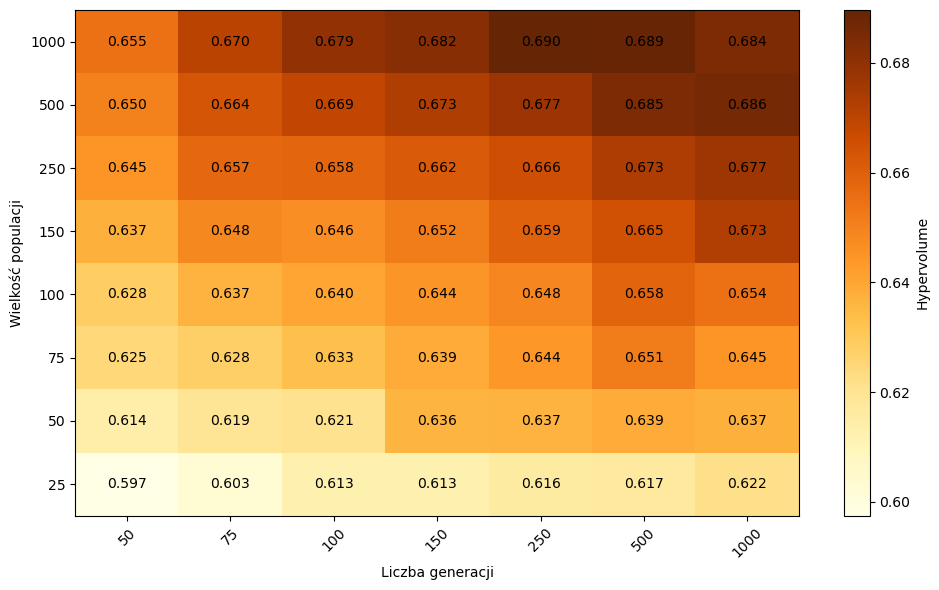

In [11]:
import numpy as np
import re
import json
import matplotlib.pyplot as plt

popSize_values = [1000, 500, 250, 150, 100, 75, 50, 25]
generation_values = [50, 75, 100, 150, 250, 500, 1000]

with open('hyperVolume_PopGen.json', 'r') as json_file:
    data2 = json.load(json_file)

# Initialize the sensitivity matrix with zeros
sensitivity_matrix2 = np.zeros((len(popSize_values), len(generation_values)))

# Fill in the sensitivity matrix with actual values
for key, value in data2.items():
    # Extract crossover and mutation values from the key using regex
    match = re.search(r'generation_(\d+) population_(\d+)', key)
    if match:
        popSize = int(match.group(2))  # Extract the population size as an integer
        generation = int(match.group(1))  # Extract the generation as an integer
        # print(f"Extracted values: popSize = {popSize}, generation = {generation}")
        if popSize in popSize_values and generation in generation_values:
            popSize_index = popSize_values.index(popSize)
            generation_index = generation_values.index(generation)
            sensitivity_matrix2[popSize_index, generation_index] = value

# Print the sensitivity matrix for debugging
print(sensitivity_matrix2)

# Create a heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.imshow(sensitivity_matrix2, cmap='YlOrBr', interpolation='nearest', aspect='auto')

# Annotate each cell with the sensitivity value
for i in range(len(popSize_values)):
    for j in range(len(generation_values)):
        plt.text(j, i, f'{sensitivity_matrix2[i, j]:.3f}', ha='center', va='center', color='black')

# Set axis labels
plt.xticks(np.arange(len(generation_values)), generation_values, rotation=45)
plt.yticks(np.arange(len(popSize_values)), popSize_values)
plt.xlabel('Liczba generacji')
plt.ylabel('Wielkość populacji')

# Display colorbar
cbar = plt.colorbar()
cbar.set_label('Hypervolume')

# Show the plot
# plt.title('Macierz analizy czułości')
plt.tight_layout()

plt.savefig('sensitivityPopGen.svg', format='svg', bbox_inches='tight')

# Save the plot as PNG
plt.savefig('sensitivityPopGen.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

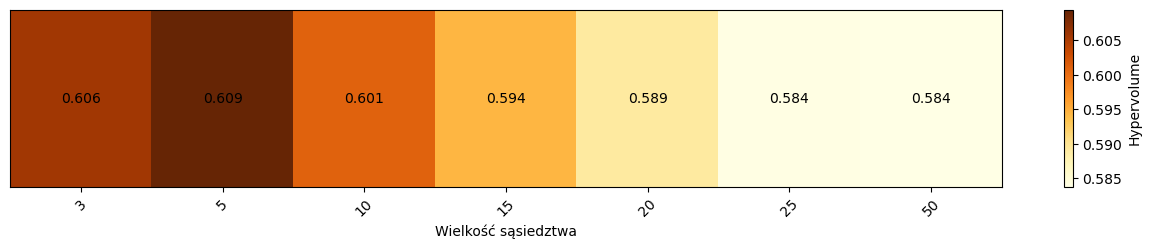

In [4]:
import numpy as np
import re
import json
import matplotlib.pyplot as plt

n_values = [3, 5, 10, 15, 20, 25, 50]

with open('hyperVolume_Neig2.json', 'r') as json_file:
    data3 = json.load(json_file)

# Initialize the sensitivity matrix with zeros
sensitivity_matrix3 = np.zeros((len(n_values)))

# Fill in the sensitivity matrix with actual values
for key, value in data3.items():
    match = re.search(r' n_(\d+)', key)
    if match:
        n = int(match.group(1))
        if n in n_values:
            n_index = n_values.index(n)
            sensitivity_matrix3[n_index] = value

# Create a heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.matshow(sensitivity_matrix3.reshape(1, -1), cmap='YlOrBr', aspect='auto')

# Annotate each cell with the sensitivity value
for i, value in enumerate(sensitivity_matrix3):
    plt.text(i, 0, f'{value:.3f}', ha='center', va='center', color='black')

# Set axis labels
plt.xticks(np.arange(len(n_values)), n_values, rotation=45)
plt.xlabel('Wielkość sąsiedztwa')

# Move x-axis labels to the bottom
plt.gca().xaxis.tick_bottom()

# Hide y-axis ticks and labels
plt.gca().yaxis.set_visible(False)

# Display colorbar
cbar = plt.colorbar(heatmap)
cbar.set_label('Hypervolume')

# Save the plot as SVG
plt.savefig('sensitivityNeig.svg', format='svg', bbox_inches='tight')

# Save the plot as PNG
plt.savefig('sensitivityNeig.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
